# 📊 Visualização de Correlação com Seaborn e Pandas

## 🎯 Objetivo
Analisar a correlação entre variáveis numéricas de um dataset médico utilizando:
- Mapa de calor (`heatmap`)
- Matriz de dispersão (`scatter_matrix`)

## 📦 Etapa 1: Importar bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

## 📂 Etapa 2: Carregar o dataset

In [2]:
df = pd.read_csv("exame_diabes.csv")

# Remover coluna de ID e aplicar One-Hot Encoding na coluna 'genero'

In [3]:
df = df.drop(columns=["id_paciente"])
df = pd.get_dummies(df, columns=["genero"], drop_first=True)

## 📈 Etapa 3: Matriz de correlação com mapa de calor

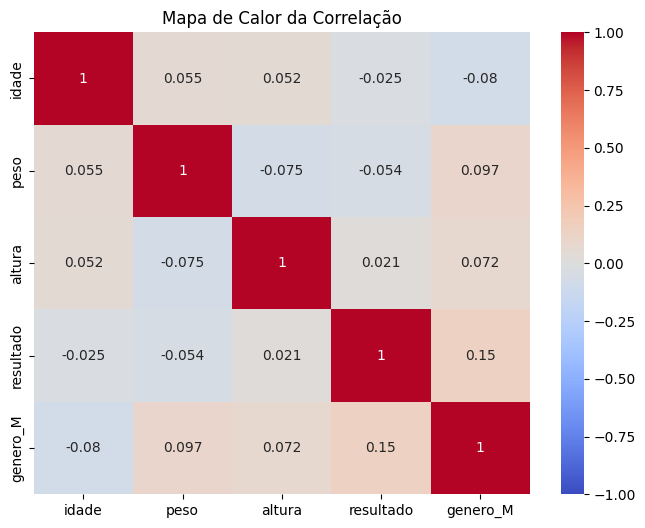

In [4]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Mapa de Calor da Correlação")
plt.show()

<Axes: >

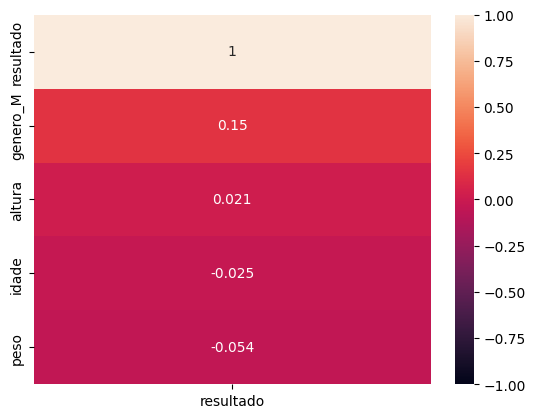

In [12]:
sns.heatmap(df.corr()[['resultado']].sort_values(by='resultado', ascending=False),vmin=-1, vmax=1, annot=True)

## ✳️ Etapa 4: Matriz de Dispersão (Scatter Matrix)

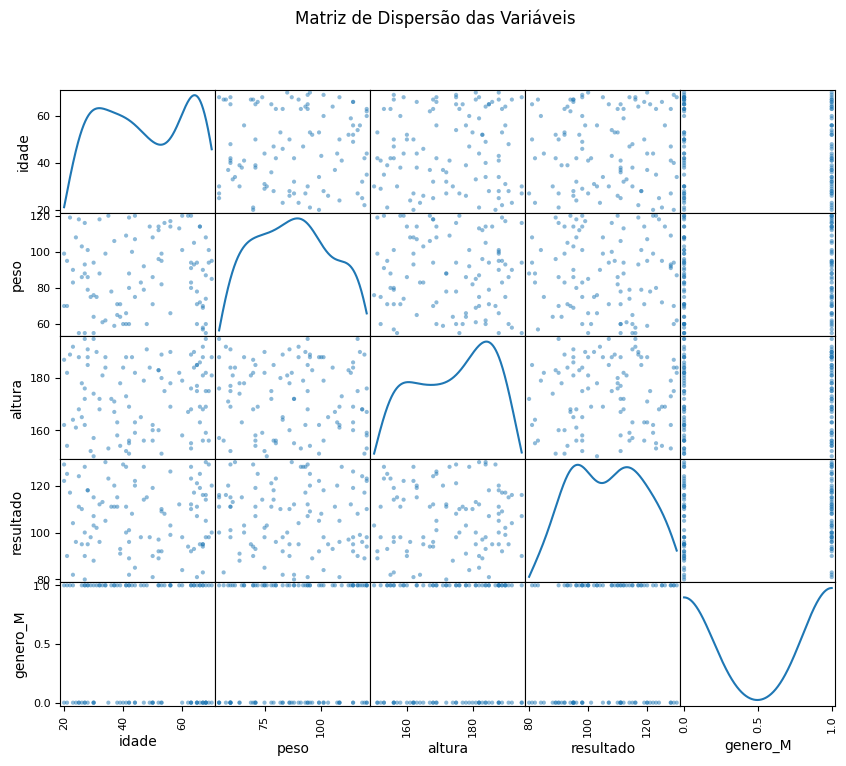

In [16]:
# Converter colunas booleanas para inteiros (0/1)
df = df.astype({col: int for col in df.select_dtypes(include='bool').columns})

# Agora pode plotar
scatter_matrix(df, figsize=(10, 8), diagonal="kde", alpha=0.5)
plt.suptitle("Matriz de Dispersão das Variáveis")
plt.show()

## 🎨 Etapa 5: Personalização de cores (opcional)

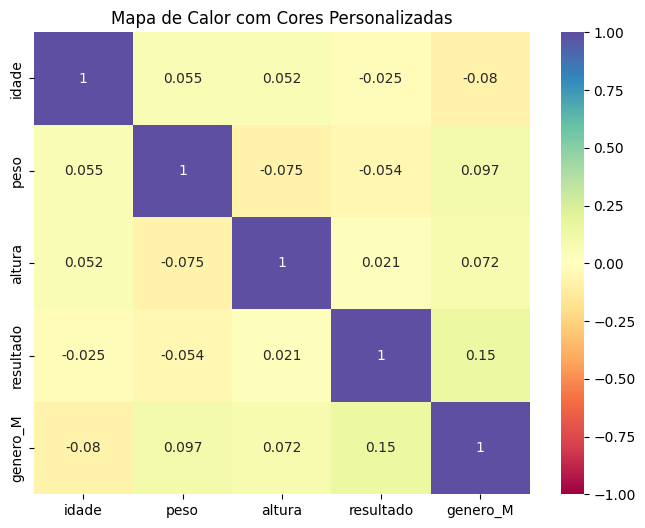

In [13]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="Spectral", vmin=-1, vmax=1)
plt.title("Mapa de Calor com Cores Personalizadas")
plt.show()

array([[<Axes: xlabel='idade', ylabel='idade'>,
        <Axes: xlabel='peso', ylabel='idade'>,
        <Axes: xlabel='altura', ylabel='idade'>,
        <Axes: xlabel='resultado', ylabel='idade'>,
        <Axes: xlabel='genero_M', ylabel='idade'>],
       [<Axes: xlabel='idade', ylabel='peso'>,
        <Axes: xlabel='peso', ylabel='peso'>,
        <Axes: xlabel='altura', ylabel='peso'>,
        <Axes: xlabel='resultado', ylabel='peso'>,
        <Axes: xlabel='genero_M', ylabel='peso'>],
       [<Axes: xlabel='idade', ylabel='altura'>,
        <Axes: xlabel='peso', ylabel='altura'>,
        <Axes: xlabel='altura', ylabel='altura'>,
        <Axes: xlabel='resultado', ylabel='altura'>,
        <Axes: xlabel='genero_M', ylabel='altura'>],
       [<Axes: xlabel='idade', ylabel='resultado'>,
        <Axes: xlabel='peso', ylabel='resultado'>,
        <Axes: xlabel='altura', ylabel='resultado'>,
        <Axes: xlabel='resultado', ylabel='resultado'>,
        <Axes: xlabel='genero_M', ylabel='re

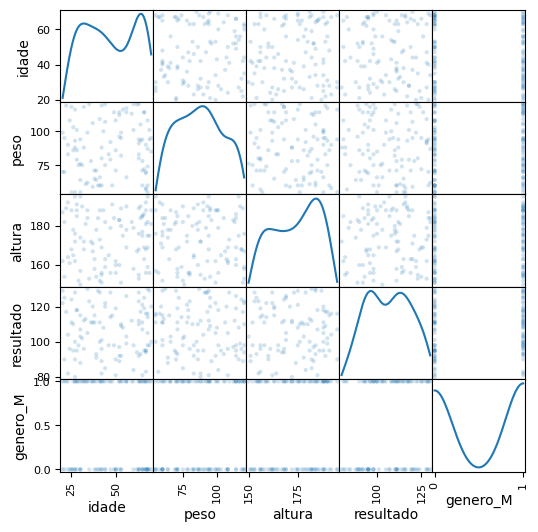

In [14]:
# Plot de Scatter (Dispersão) com Distribuição

pd.plotting.scatter_matrix(df, alpha=0.2, figsize=(6,6), diagonal='kde')


array([[<Axes: title={'center': 'idade'}>,
        <Axes: title={'center': 'peso'}>,
        <Axes: title={'center': 'altura'}>],
       [<Axes: title={'center': 'resultado'}>,
        <Axes: title={'center': 'genero_M'}>, <Axes: >]], dtype=object)

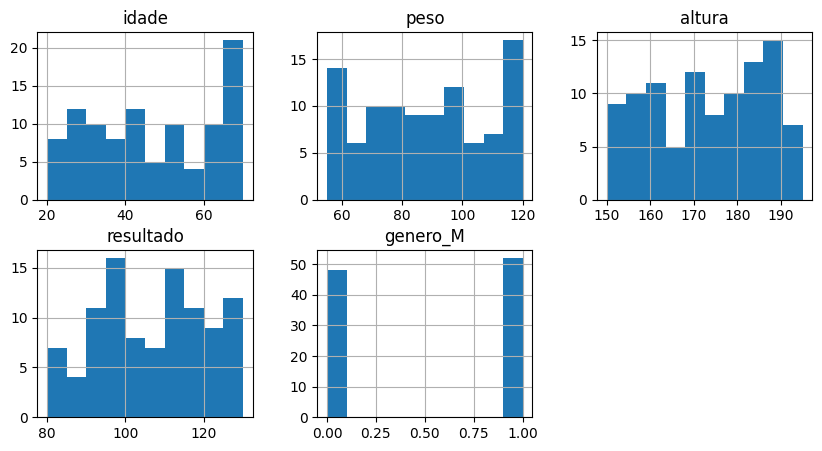

In [17]:
df.hist(layout=(2,3), figsize=(10,5))

## ✅ Conclusão

- Usamos `heatmap` para ver correlação entre variáveis com escala controlada (-1 a 1)
- Criamos `scatter_matrix` para entender relações entre pares de variáveis
- Esse tipo de análise ajuda a detectar colinearidade e guiar a seleção de features
